In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
glass_data = pd.read_csv('../input/glass.csv')

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [8]:
# To check whether the data is balanced or imbalanced
glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
n_features = glass_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(glass_data.iloc[:,0:n_features-1], glass_data.iloc[:,n_features-1], test_size = 0.33)

In [10]:
x_train = x_train.values
x_test = x_test.values

y_train = y_train.values
y_test = y_test.values

In [11]:
def predict(x_train, y_train, x_test, k):
    predictions = []
    for x in x_test:
        pred = predict_item(x_train, y_train, x, k)
        predictions.append(pred)
    return predictions

def predict_item(x_train, y_train, x_test, k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i] - x_test)**2).sum()
        distances.append([distance,i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0]

In [12]:
neighbors = 15
accuracies = []
for k in range(1, neighbors):
    y_pred = predict(x_train, y_train, x_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("K-Neighbours are {} and Accuracy is {}".format(k,accuracy))

K-Neighbours are 1 and Accuracy is 0.8028169014084507
K-Neighbours are 2 and Accuracy is 0.8028169014084507
K-Neighbours are 3 and Accuracy is 0.7323943661971831
K-Neighbours are 4 and Accuracy is 0.7183098591549296
K-Neighbours are 5 and Accuracy is 0.647887323943662
K-Neighbours are 6 and Accuracy is 0.6619718309859155
K-Neighbours are 7 and Accuracy is 0.647887323943662
K-Neighbours are 8 and Accuracy is 0.6619718309859155
K-Neighbours are 9 and Accuracy is 0.6901408450704225
K-Neighbours are 10 and Accuracy is 0.6338028169014085
K-Neighbours are 11 and Accuracy is 0.647887323943662
K-Neighbours are 12 and Accuracy is 0.6338028169014085
K-Neighbours are 13 and Accuracy is 0.647887323943662
K-Neighbours are 14 and Accuracy is 0.6619718309859155


In [13]:
print(confusion_matrix(y_test, y_pred))

[[22  4  0  0  0  0]
 [ 7 15  0  0  0  0]
 [ 3  3  0  0  0  0]
 [ 0  1  0  2  0  2]
 [ 1  0  0  0  0  2]
 [ 1  0  0  0  0  8]]


In [14]:
neighbors = range(1,neighbors)

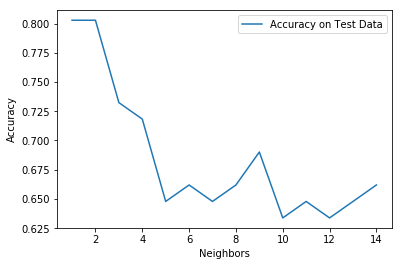

In [15]:
plt.plot(neighbors, accuracies, label='Accuracy on Test Data')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
param_grid = {'n_neighbors':list(range(1,15)), 'metric': ['euclidean']} 
clf_g = GridSearchCV(KNeighborsClassifier(), param_grid)
clf_g.fit(x_train,y_train)
print('Best Parameters are \n',clf_g.best_params_)
print('Best Estimator are \n',clf_g.best_estimator_)

Best Parameters are 
 {'metric': 'euclidean', 'n_neighbors': 6}
Best Estimator are 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
# Confusion Matrix on using sklearn library
clf = KNeighborsClassifier(n_neighbors = 8)
clf.fit(x_train,y_train)
y_pred_KNN = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred_KNN))

[[22  4  0  0  0  0]
 [ 8 13  1  0  0  0]
 [ 5  1  0  0  0  0]
 [ 0  2  0  1  0  2]
 [ 1  1  0  0  0  1]
 [ 1  0  0  0  0  8]]


In [20]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy is: {} at depth {}'.format(accuracy_score(y_test, y_pred), i))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Accuracy is: 0.5633802816901409 at depth 1
Accuracy is: 0.6197183098591549 at depth 2
Accuracy is: 0.647887323943662 at depth 3
Accuracy is: 0.6619718309859155 at depth 4
Accuracy is: 0.704225352112676 at depth 5
Accuracy is: 0.7605633802816901 at depth 6
Accuracy is: 0.7183098591549296 at depth 7
Accuracy is: 0.7887323943661971 at depth 8
Accuracy is: 0.7183098591549296 at depth 9
Accuracy is: 0.7183098591549296 at depth 10
Accuracy is: 0.7746478873239436 at depth 11
Accuracy is: 0.6338028169014085 at depth 12
Accuracy is: 0.704225352112676 at depth 13
Accuracy is: 0.7323943661971831 at depth 14
Accuracy is: 0.7605633802816901 at depth 15
Accuracy is: 0.7183098591549296 at depth 16
Accuracy is: 0.7464788732394366 at depth 17
Accuracy is: 0.7323943661971831 at depth 18
Accuracy is: 0.6901408450704225 at depth 19


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
sc = StandardScaler()
data = sc.fit_transform(glass_data.iloc[:,0:n_features-1])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, glass_data.iloc[:,n_features-1], test_size = 0.33)

In [23]:
y_train = y_train.values
y_test = y_test.values

In [24]:
neighbors = 15
accuracies = []
for k in range(1, neighbors):
    y_pred = predict(x_train, y_train, x_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("K-Neighbours are {} and Accuracy is {}".format(k,accuracy))

K-Neighbours are 1 and Accuracy is 0.647887323943662
K-Neighbours are 2 and Accuracy is 0.647887323943662
K-Neighbours are 3 and Accuracy is 0.6338028169014085
K-Neighbours are 4 and Accuracy is 0.6056338028169014
K-Neighbours are 5 and Accuracy is 0.6197183098591549
K-Neighbours are 6 and Accuracy is 0.6056338028169014
K-Neighbours are 7 and Accuracy is 0.6197183098591549
K-Neighbours are 8 and Accuracy is 0.6056338028169014
K-Neighbours are 9 and Accuracy is 0.6056338028169014
K-Neighbours are 10 and Accuracy is 0.5915492957746479
K-Neighbours are 11 and Accuracy is 0.6056338028169014
K-Neighbours are 12 and Accuracy is 0.5915492957746479
K-Neighbours are 13 and Accuracy is 0.5915492957746479
K-Neighbours are 14 and Accuracy is 0.5633802816901409
